<a href="https://colab.research.google.com/github/Nicolaakmal/Pemrograman_Python_Neural-Network/blob/main/Pertemuan11_Image_Classification_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd /content/drive/MyDrive

/content/drive/MyDrive


In [ ]:
ls

'1101194088_Nicola Akmal Afrinaldi.rar'
 20200815_115605.jpg
 3scene/
'4_Nicola Akmal Afrinaldi (2).jpeg'
'4_Nicola Akmal Afrinaldi.jpeg'
'Audio Video.gdoc'
 Classroom/
'Colab Notebooks'/
'DataboksCompetition_Nicola Akmal Afrinaldi_DC-0840_Mengulik Strategi Untuk Meningkatkan Stabilitas Nasional Pasca Pandemi.pdf'
'Dok baru 2020-04-27 15.21.21_1.jpg'
'Dokumen tanpa judul (10).gdoc'
'Dokumen tanpa judul (1).gdoc'
'Dokumen tanpa judul (2).gdoc'
'Dokumen tanpa judul (3).gdoc'
'Dokumen tanpa judul (4).gdoc'
'Dokumen tanpa judul (5).gdoc'
'Dokumen tanpa judul (6).gdoc'
'Dokumen tanpa judul (7).gdoc'
'Dokumen tanpa judul (8).gdoc'
'Dokumen tanpa judul (9).gdoc'
'Dokumen tanpa judul.gdoc'
 feri1.jpg
 feri.jpeg
'File oppo f1s'/
 forest_bost98.jpg
'Formulir tanpa judul (1).gform'
'Formulir tanpa judul (2).gform'
'Formulir tanpa judul.gform'
'Foto formal'/
'Hasil record pertemuan 3.mp4'
 hutan.jpeg
 Image_Classification_CNN/
'(Jartel) Kuliah jartel smt-3'/
 KTM_1.jpg
'(Mavek) minggu 2.mp4'
 MRV/

In [ ]:
# import the necessary packages
from keras.models import Sequential
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dense
from keras.optimizers import Adam
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from PIL import Image
from imutils import paths
import numpy as np
import os

In [ ]:
# grab all image paths in the input dataset directory, then initialize
# our list of images and corresponding class labels
print("[INFO] loading images...")
imagePaths = paths.list_images("Image_Classification_CNN")
data = []
labels = []

[INFO] loading images...


In [ ]:
# loop over our input images
for imagePath in imagePaths:
	# load the input image from disk, resize it to 64x64 pixels, scale
	# the pixel intensities to the range [0, 1], and then update our
	# images list
	image = Image.open(imagePath)
  #preprocessing
	image = np.array(image.resize((200, 200))) / 255.0 #normalisasi
	data.append(image)

	# extract the class label from the file path and update the
	# labels list
	label = imagePath.split(os.path.sep)[-2]
	labels.append(label)

In [ ]:
print(labels)

['GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05', 'GMB_05',

In [ ]:
# encode the labels, converting them from strings to integers
lb = LabelBinarizer()
labels = lb.fit_transform(labels)

In [ ]:
print(labels)

[[0 0 0 0 1]
 [0 0 0 0 1]
 [0 0 0 0 1]
 ...
 [0 0 0 1 0]
 [0 0 0 1 0]
 [0 0 0 1 0]]


In [ ]:
# perform a training and testing split, using 75% of the data for
# training and 25% for evaluation
(trainX, testX, trainY, testY) = train_test_split(np.array(data),	np.array(labels), test_size=0.25, shuffle=True)
print(trainX.shape)
print(testX.shape)

(438, 200, 200, 3)
(146, 200, 200, 3)


In [ ]:
from keras.layers import Convolution2D, MaxPooling2D
from keras.models import Sequential
from keras.layers.core import Flatten, Dense

model1 = Sequential()
model1.add(Convolution2D(8, (3,3), activation='relu', input_shape=(200,200,3)))
model1.add(MaxPooling2D(2,2))
model1.add(Convolution2D(16, (3,3), activation='relu'))
model1.add(MaxPooling2D(2,2))
model1.add(Convolution2D(32, (3,3), activation='relu'))
model1.add(MaxPooling2D(2,2))
model1.add(Convolution2D(64, (3,3), activation='relu'))
model1.add(MaxPooling2D(2,2))
#fully connected layer
model1.add(Flatten())
model1.add(Dense(100, activation='relu'))
model1.add(Dense(5, activation='softmax'))

model1.summary()

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_53 (Conv2D)           (None, 198, 198, 8)       224       
_________________________________________________________________
max_pooling2d_51 (MaxPooling (None, 99, 99, 8)         0         
_________________________________________________________________
conv2d_54 (Conv2D)           (None, 97, 97, 16)        1168      
_________________________________________________________________
max_pooling2d_52 (MaxPooling (None, 48, 48, 16)        0         
_________________________________________________________________
conv2d_55 (Conv2D)           (None, 46, 46, 32)        4640      
_________________________________________________________________
max_pooling2d_53 (MaxPooling (None, 23, 23, 32)        0         
_________________________________________________________________
conv2d_56 (Conv2D)           (None, 21, 21, 64)      

In [ ]:
# train the model using the Adam optimizer
print("[INFO] training network...")
opt = Adam(lr=1e-3, decay=1e-3 / 50)
model1.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

[INFO] training network...


In [ ]:
H = model1.fit(trainX, trainY, validation_data=(testX, testY), epochs=25, batch_size=32)

Epoch 1/25
14/14 [==============================] - 10s 705ms/step - loss: 1.6198 - accuracy: 0.2260 - val_loss: 1.5913 - val_accuracy: 0.3151
Epoch 2/25
14/14 [==============================] - 10s 693ms/step - loss: 1.5369 - accuracy: 0.3037 - val_loss: 1.4194 - val_accuracy: 0.3630
Epoch 3/25
14/14 [==============================] - 10s 695ms/step - loss: 1.3482 - accuracy: 0.4087 - val_loss: 1.3026 - val_accuracy: 0.4932
Epoch 4/25
14/14 [==============================] - 10s 700ms/step - loss: 1.1875 - accuracy: 0.5708 - val_loss: 1.0923 - val_accuracy: 0.5548
Epoch 5/25
14/14 [==============================] - 10s 697ms/step - loss: 1.0893 - accuracy: 0.6073 - val_loss: 0.9685 - val_accuracy: 0.6712
Epoch 6/25
14/14 [==============================] - 10s 700ms/step - loss: 0.8547 - accuracy: 0.6941 - val_loss: 0.9617 - val_accuracy: 0.6575
Epoch 7/25
14/14 [==============================] - 10s 693ms/step - loss: 0.7322 - accuracy: 0.7283 - val_loss: 0.7263 - val_accuracy: 0.7192

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


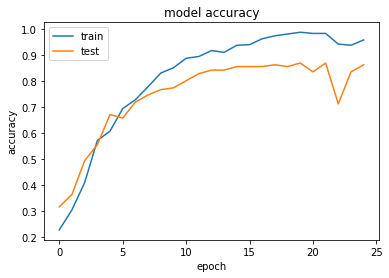

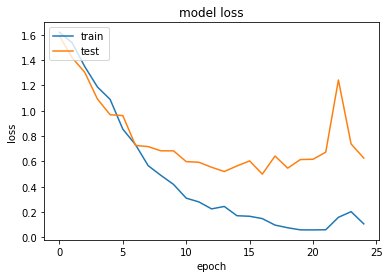

In [ ]:
import matplotlib.pyplot as plt

print(H.history.keys())
# summarize history for accuracy
plt.plot(H.history['accuracy'])
plt.plot(H.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(H.history['loss'])
plt.plot(H.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
# evaluate the network
print("[INFO] evaluating network...")
predictions = model1.predict(testX, batch_size=32)
print(classification_report(testY.argmax(axis=1),
	predictions.argmax(axis=1), target_names=lb.classes_))

[INFO] evaluating network...
              precision    recall  f1-score   support

      GMB_01       0.79      0.87      0.83        30
      GMB_02       0.90      0.66      0.76        29
      GMB_03       0.85      0.97      0.90        29
      GMB_04       0.90      0.87      0.89        31
      GMB_05       0.90      0.96      0.93        27

    accuracy                           0.86       146
   macro avg       0.87      0.86      0.86       146
weighted avg       0.87      0.86      0.86       146



In [ ]:
import cv2
import matplotlib.pyplot as plt
image1='daun.png'

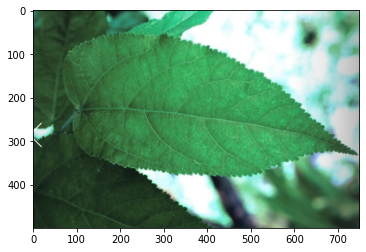

In [ ]:
img_array = cv2.imread(image1)
plt.imshow(img_array)
plt.show()
# print(type(img_array))

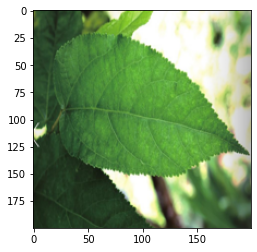

In [ ]:
image_testing = Image.open('daun.png')
image_testing = np.array(image_testing.resize((200, 200))) / 255.0
image_testing.shape
plt.imshow(image_testing)
plt.show()

In [ ]:
image_testing = np.expand_dims(image_testing, axis=0)
print(image_testing.shape)

(1, 200, 200, 3)


In [ ]:

output = model1.predict(image_testing, 1)
print(output)
print(lb.classes_[output.argmax(axis=1)])

[[0.8268135  0.15561219 0.01027908 0.00556271 0.00173236]]
['GMB_01']
